In [1]:
#Import all required libraries for reading data, analysing and visualizing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
#Read the training & test data
liver_df = pd.read_csv('/Users/jitenderkumar/Documents/indian_liver_patient.csv')

# Data Analysis

In [3]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
#Describe gives statistical information about NUMERICAL columns in the dataset
liver_df.describe(include='all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [6]:
#Which features are available in the dataset?
liver_df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [7]:
#Check for any null values
liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

# Data Visualization

Patients with liver disease:  416
Patients not diagnosed with liver disease:  167


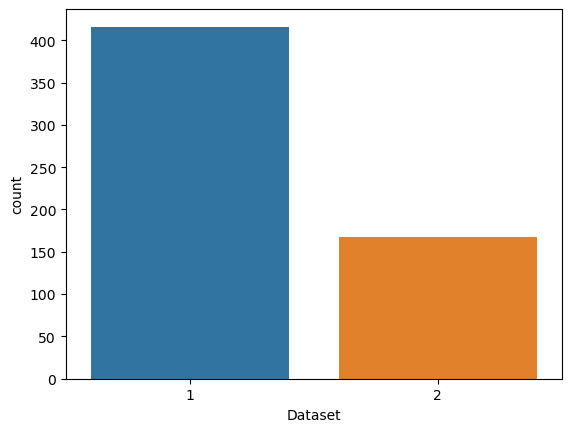

In [8]:
sns.countplot(data=liver_df, x = 'Dataset', label='Count')

LD, NLD = liver_df['Dataset'].value_counts()
print('Patients with liver disease: ',LD)
print('Patients not diagnosed with liver disease: ',NLD)

Male patients:  441
Female Patients:  142


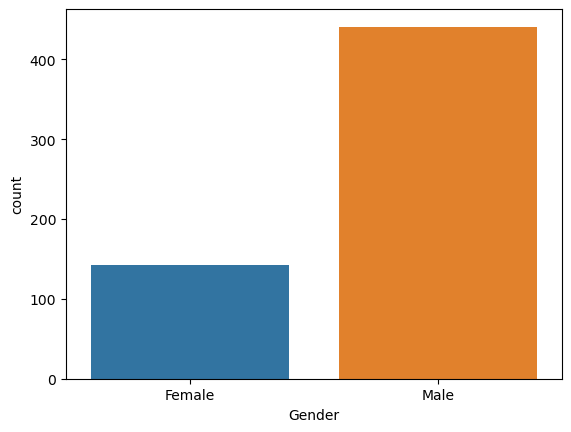

In [9]:
sns.countplot(data=liver_df, x = 'Gender', label='Count')

M, F = liver_df['Gender'].value_counts()
print('Male patients: ',M)
print('Female Patients: ',F)

/Users/jitenderkumar/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


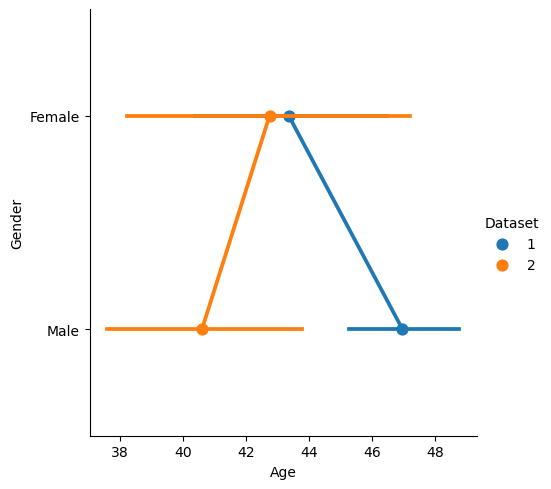

In [10]:
sns.factorplot(x="Age", y="Gender", hue="Dataset", data=liver_df);

For both the genders age is the factor for liver disease

In [11]:
liver_df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).count().sort_values(by='Dataset', ascending=False)


,Dataset,Gender,Age
2,2,Female,50
3,2,Male,117
0,1,Female,92
1,1,Male,324


In [12]:
liver_df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).mean().sort_values(by='Dataset', ascending=False)


,Dataset,Gender,Age
2,2,Female,42.740000
3,2,Male,40.598291
0,1,Female,43.347826
1,1,Male,46.950617


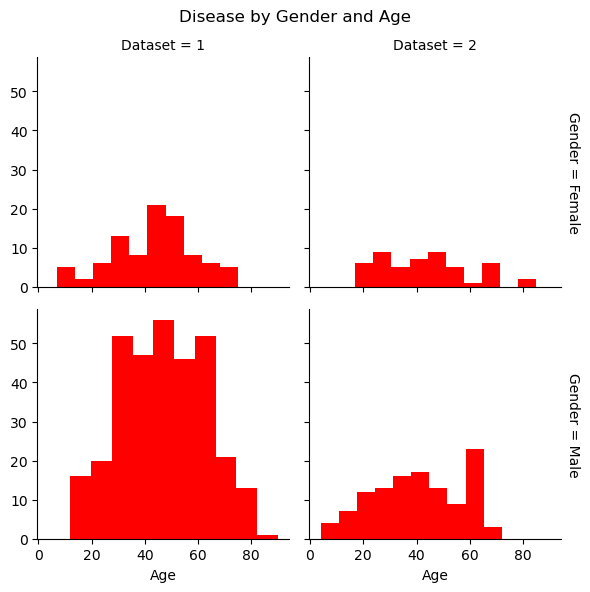

In [13]:
g = sns.FacetGrid(liver_df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

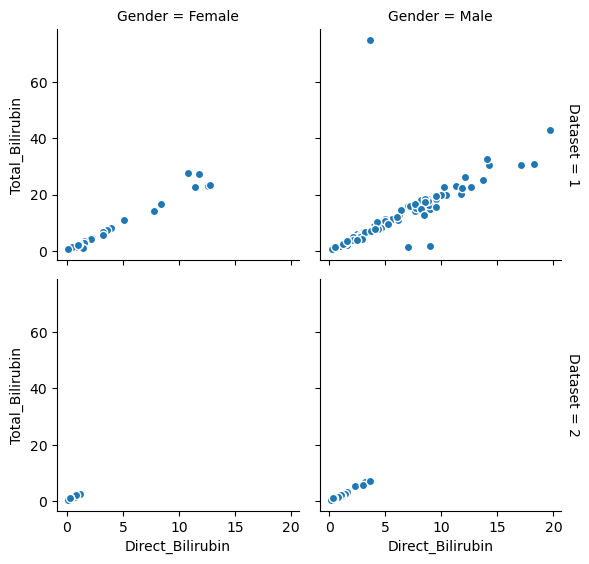

In [14]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

There seems to be direct relationship between Total_Bilirubin and Direct_Bilirubin. We have the possibility of removing one of this feature.

/Users/jitenderkumar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


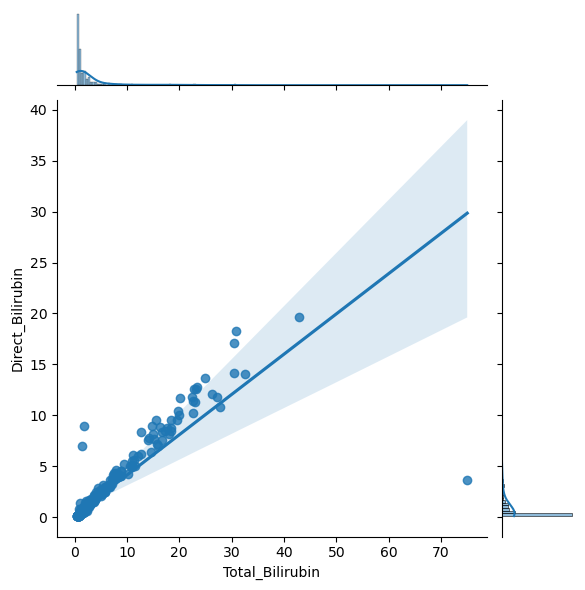

In [15]:
sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=liver_df, kind="reg")

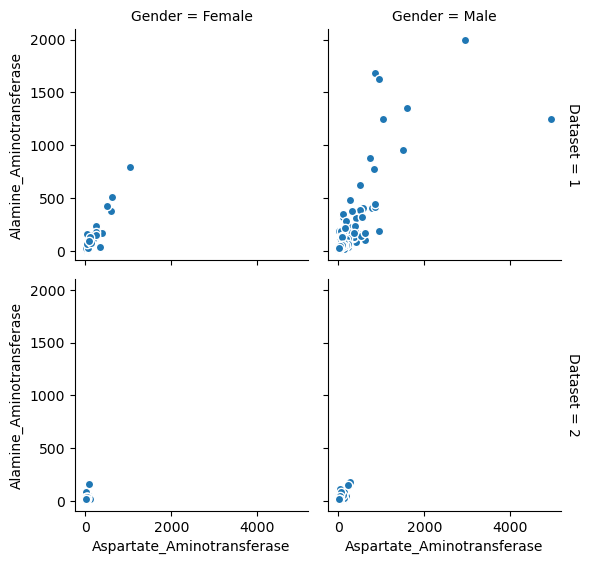

In [16]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

There is linear relationship between Aspartate_Aminotransferase and Alamine_Aminotransferase and the gender. We have the possibility of removing one of this feature

/Users/jitenderkumar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


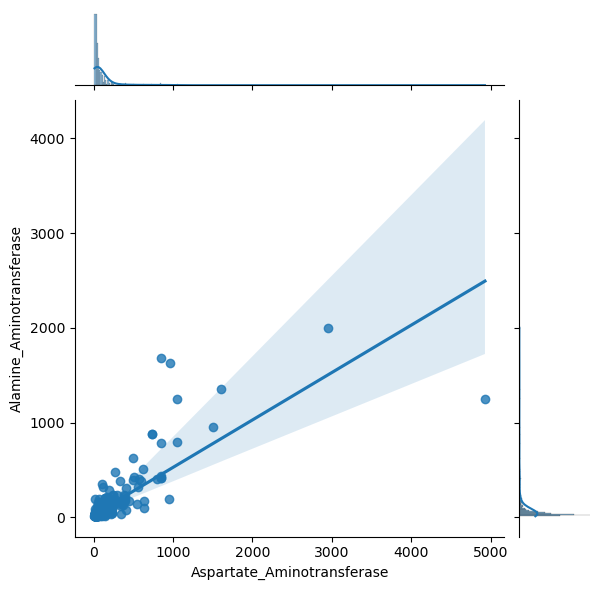

In [17]:
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=liver_df, kind="reg")

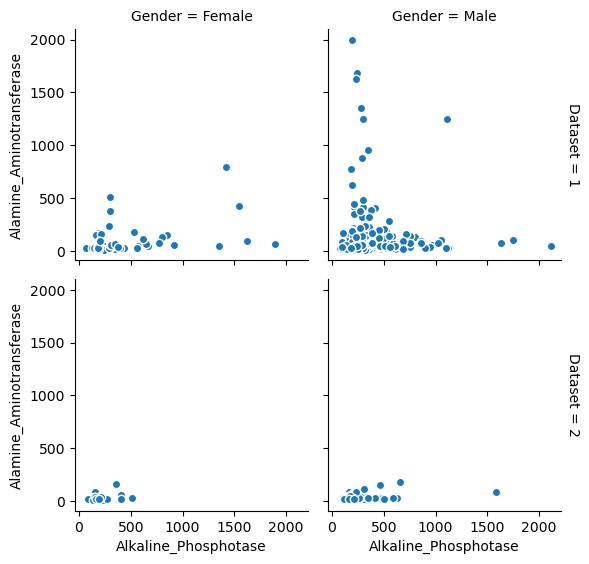

In [18]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Alkaline_Phosphotase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

/Users/jitenderkumar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


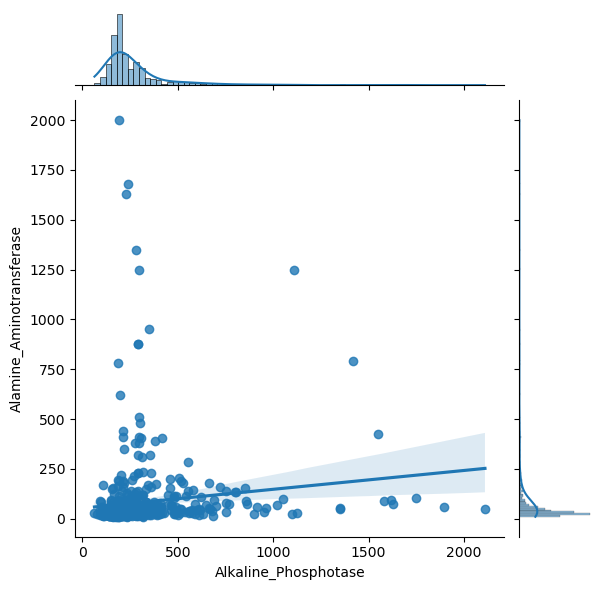

In [19]:
sns.jointplot("Alkaline_Phosphotase", "Alamine_Aminotransferase", data=liver_df, kind="reg")

No linear correlation between Alkaline_Phosphotase and Alamine_Aminotransferase

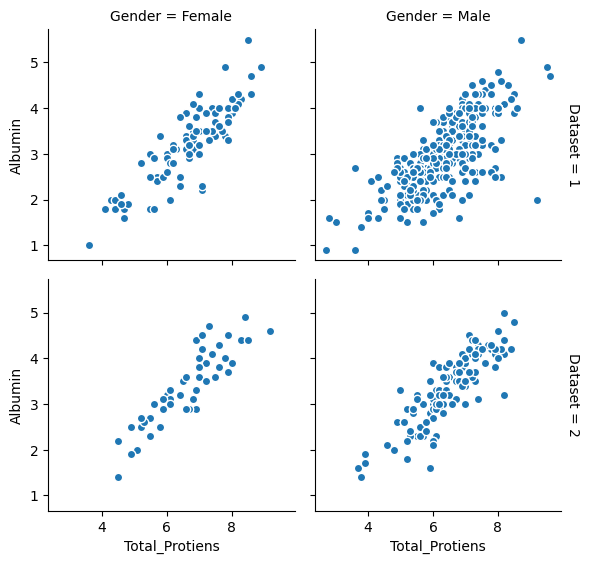

In [20]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Total_Protiens", "Albumin",  edgecolor="w")
plt.subplots_adjust(top=0.9)

There is linear relationship between Total_Protiens and Albumin and the gender. We have the possibility of removing one of this feature.

/Users/jitenderkumar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


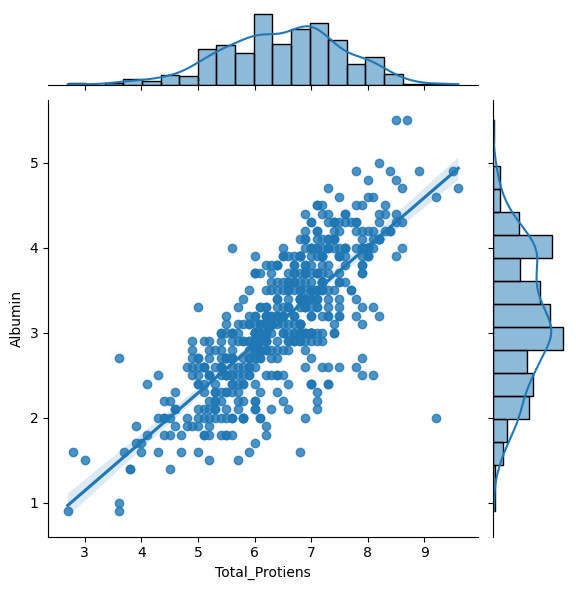

In [21]:
sns.jointplot("Total_Protiens", "Albumin", data=liver_df, kind="reg")

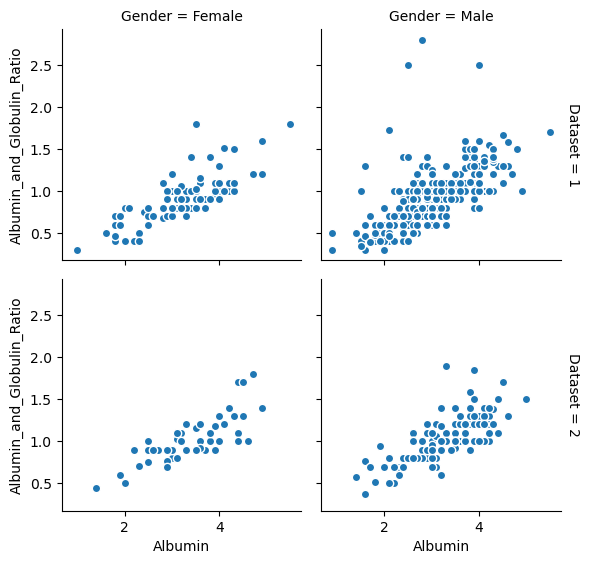

In [22]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin", "Albumin_and_Globulin_Ratio",  edgecolor="w")
plt.subplots_adjust(top=0.9)

There is linear relationship between Albumin_and_Globulin_Ratio and Albumin. We have the possibility of removing one of this feature.

/Users/jitenderkumar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


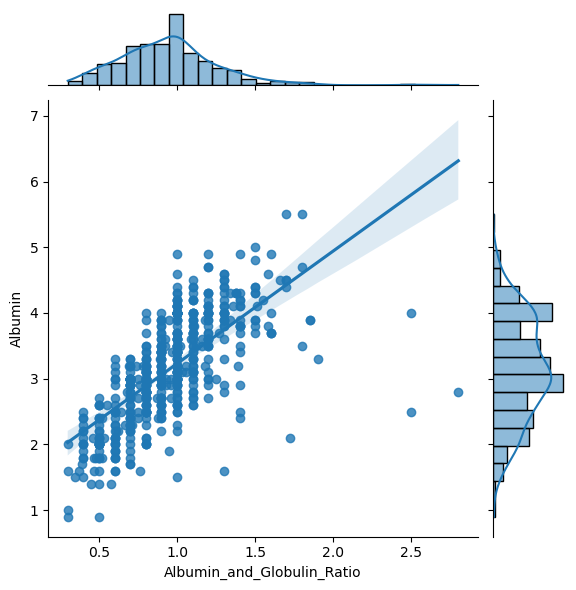

In [23]:
sns.jointplot("Albumin_and_Globulin_Ratio", "Albumin", data=liver_df, kind="reg")

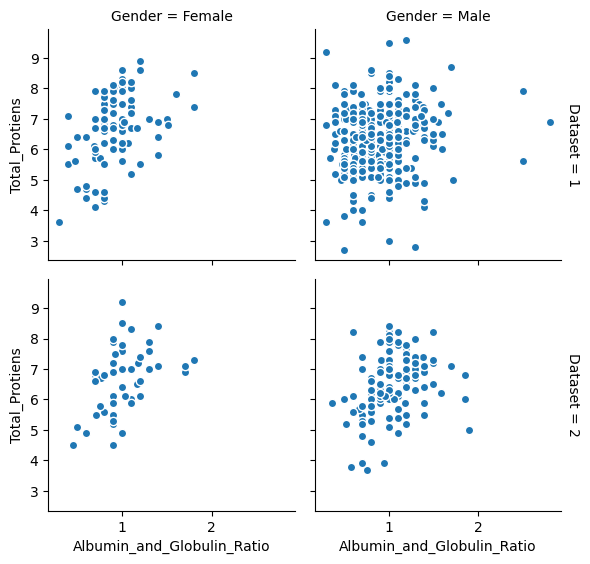

In [24]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin_and_Globulin_Ratio", "Total_Protiens",  edgecolor="w")
plt.subplots_adjust(top=0.9)

# Data Pre-processing and Observation

Based on the jointplots and scatterplots shown above, it can be observed that certain features are directly related to each other. Specifically, there is a direct relationship between the following features: Direct_Bilirubin and Total_Bilirubin, Aspartate_Aminotransferase and Alamine_Aminotransferase, Total_Protiens and Albumin, and Albumin_and_Globulin_Ratio and Albumin.

Therefore, it is possible to eliminate one of these related features without losing important information. In this case, the following features will be retained: Total_Bilirubin, Alamine_Aminotransferase, Total_Protiens, Albumin_and_Globulin_Ratio, and Albumin.





In [25]:
liver_df.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1


Convert categorical variable "Gender" to indicator variables



In [26]:
pd.get_dummies(liver_df['Gender'], prefix = 'Gender').head()


,Gender_Female,Gender_Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [27]:
liver_df = pd.concat([liver_df,pd.get_dummies(liver_df['Gender'], prefix = 'Gender')], axis=1)

In [28]:
liver_df.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [29]:
liver_df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449,0.243568,0.756432
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490,0.429603,0.429603
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000,0.000000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000,0.000000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000,0.000000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000,0.000000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000,1.000000,1.000000


In [30]:
liver_df.drop_duplicates()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2,0,1
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1,0,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1,0,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1,0,1


In [31]:
liver_df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449,0.243568,0.756432
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490,0.429603,0.429603
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000,0.000000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000,0.000000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000,0.000000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000,0.000000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000,1.000000,1.000000


In [32]:
liver_df[liver_df['Albumin_and_Globulin_Ratio'].isnull()]


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1,1,0
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1,0,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2,1,0
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2,0,1


In [33]:
liver_df["Albumin_and_Globulin_Ratio"] = liver_df.Albumin_and_Globulin_Ratio.fillna(liver_df['Albumin_and_Globulin_Ratio'].mean())


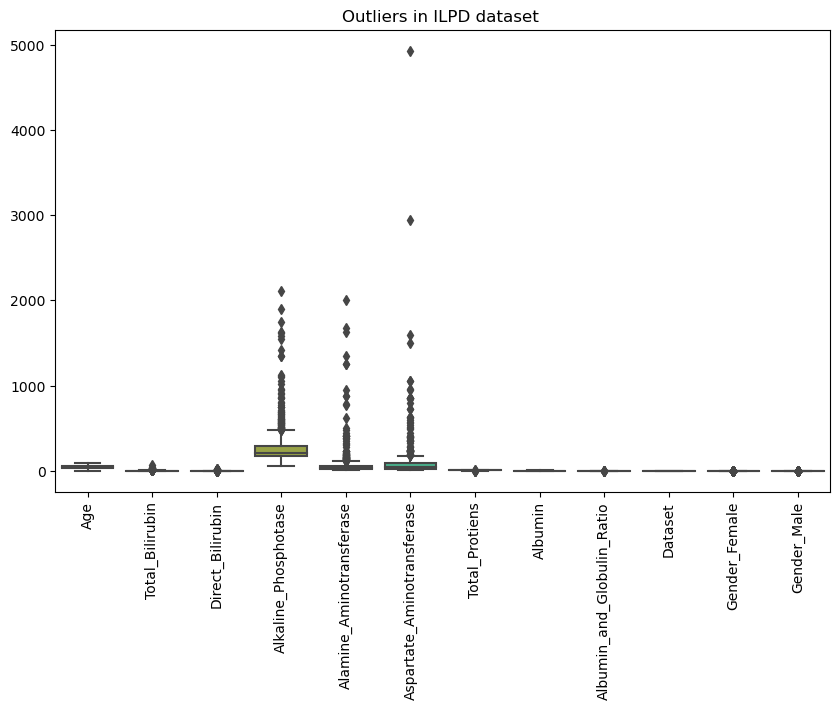

In [34]:
# Show the outliers in the dataset before balancing
plt.figure(figsize=(10,6)) 
ax = sns.boxplot(data=liver_df) 
plt.title("Outliers in ILPD dataset ")
plt.setp(ax.get_xticklabels(), rotation=90) 
plt.show()

In [35]:
# Handle outliers in the dataset before balancing
Q1 = liver_df.quantile(0.25) 
Q3 = liver_df.quantile(0.75) 
IQR = Q3 - Q1
liver_df = liver_df[~((liver_df < (Q1 - 1.5 * IQR)) |(liver_df > (Q3 + 1.5 * IQR))).any(axis=1)]

/var/folders/gx/8t3m6rfn0ss15x75np39qrbh0000gn/T/ipykernel_18599/2312652857.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  liver_df = liver_df[~((liver_df < (Q1 - 1.5 * IQR)) |(liver_df > (Q3 + 1.5 * IQR))).any(axis=1)]


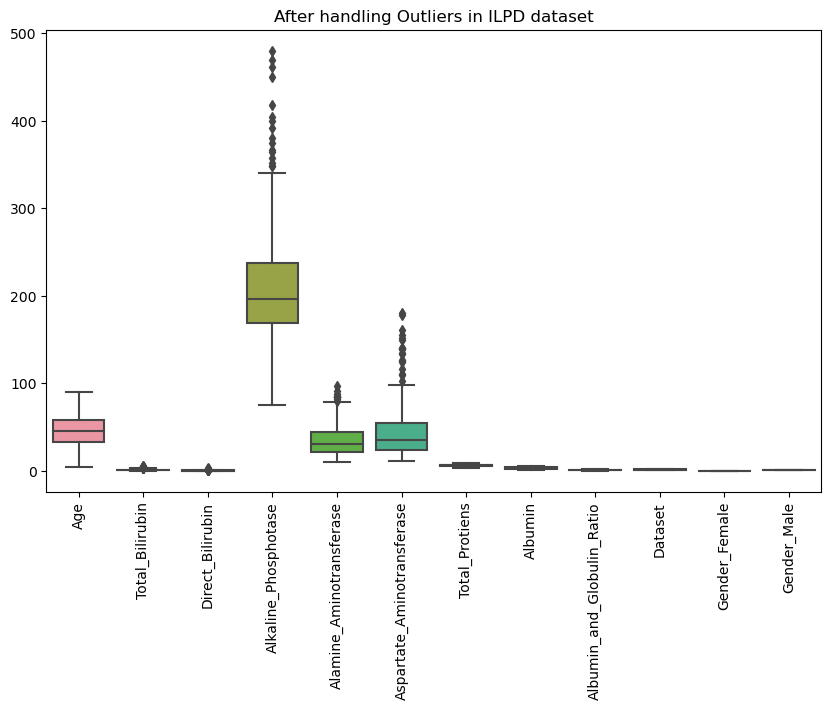

In [36]:
# Show the outliers in the dataset after handling outliers
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=liver_df)
plt.title("After handling Outliers in ILPD dataset")# before balancing")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

In [37]:
# The input variables/features are all the inputs except Dataset. The prediction or label is 'Dataset' that determines whether the patient has liver disease or not. 
X = liver_df.drop(['Gender','Dataset'], axis=1)
X.head(3)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
3,58,1.0,0.4,182,14,20,6.8,3.4,1.0,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.4,0,1
5,46,1.8,0.7,208,19,14,7.6,4.4,1.3,0,1


In [38]:
y = liver_df['Dataset'] # 1 for liver disease; 2 for no liver disease

In [39]:
# Correlation
liver_corr = X.corr()

In [40]:
liver_corr

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
Age,1.000000,0.095466,0.093743,-0.041151,-0.086646,-0.037336,-0.204089,-0.280652,-0.220111,NaN,NaN
Total_Bilirubin,0.095466,1.000000,0.972798,0.139907,0.151913,0.296736,-0.016371,-0.184611,-0.253304,NaN,NaN
Direct_Bilirubin,0.093743,0.972798,1.000000,0.151866,0.110039,0.265551,0.009730,-0.181326,-0.267505,NaN,NaN
Alkaline_Phosphotase,-0.041151,0.139907,0.151866,1.000000,0.236941,0.185065,0.051582,-0.075345,-0.179877,NaN,NaN
Alamine_Aminotransferase,-0.086646,0.151913,0.110039,0.236941,1.000000,0.603563,-0.037599,-0.013566,0.006720,NaN,NaN
Aspartate_Aminotransferase,-0.037336,0.296736,0.265551,0.185065,0.603563,1.000000,-0.138251,-0.177310,-0.136422,NaN,NaN
Total_Protiens,-0.204089,-0.016371,0.009730,0.051582,-0.037599,-0.138251,1.000000,0.821262,0.260666,NaN,NaN
Albumin,-0.280652,-0.184611,-0.181326,-0.075345,-0.013566,-0.177310,0.821262,1.000000,0.748335,NaN,NaN
Albumin_and_Globulin_Ratio,-0.220111,-0.253304,-0.267505,-0.179877,0.006720,-0.136422,0.260666,0.748335,1.000000,NaN,NaN
Gender_Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


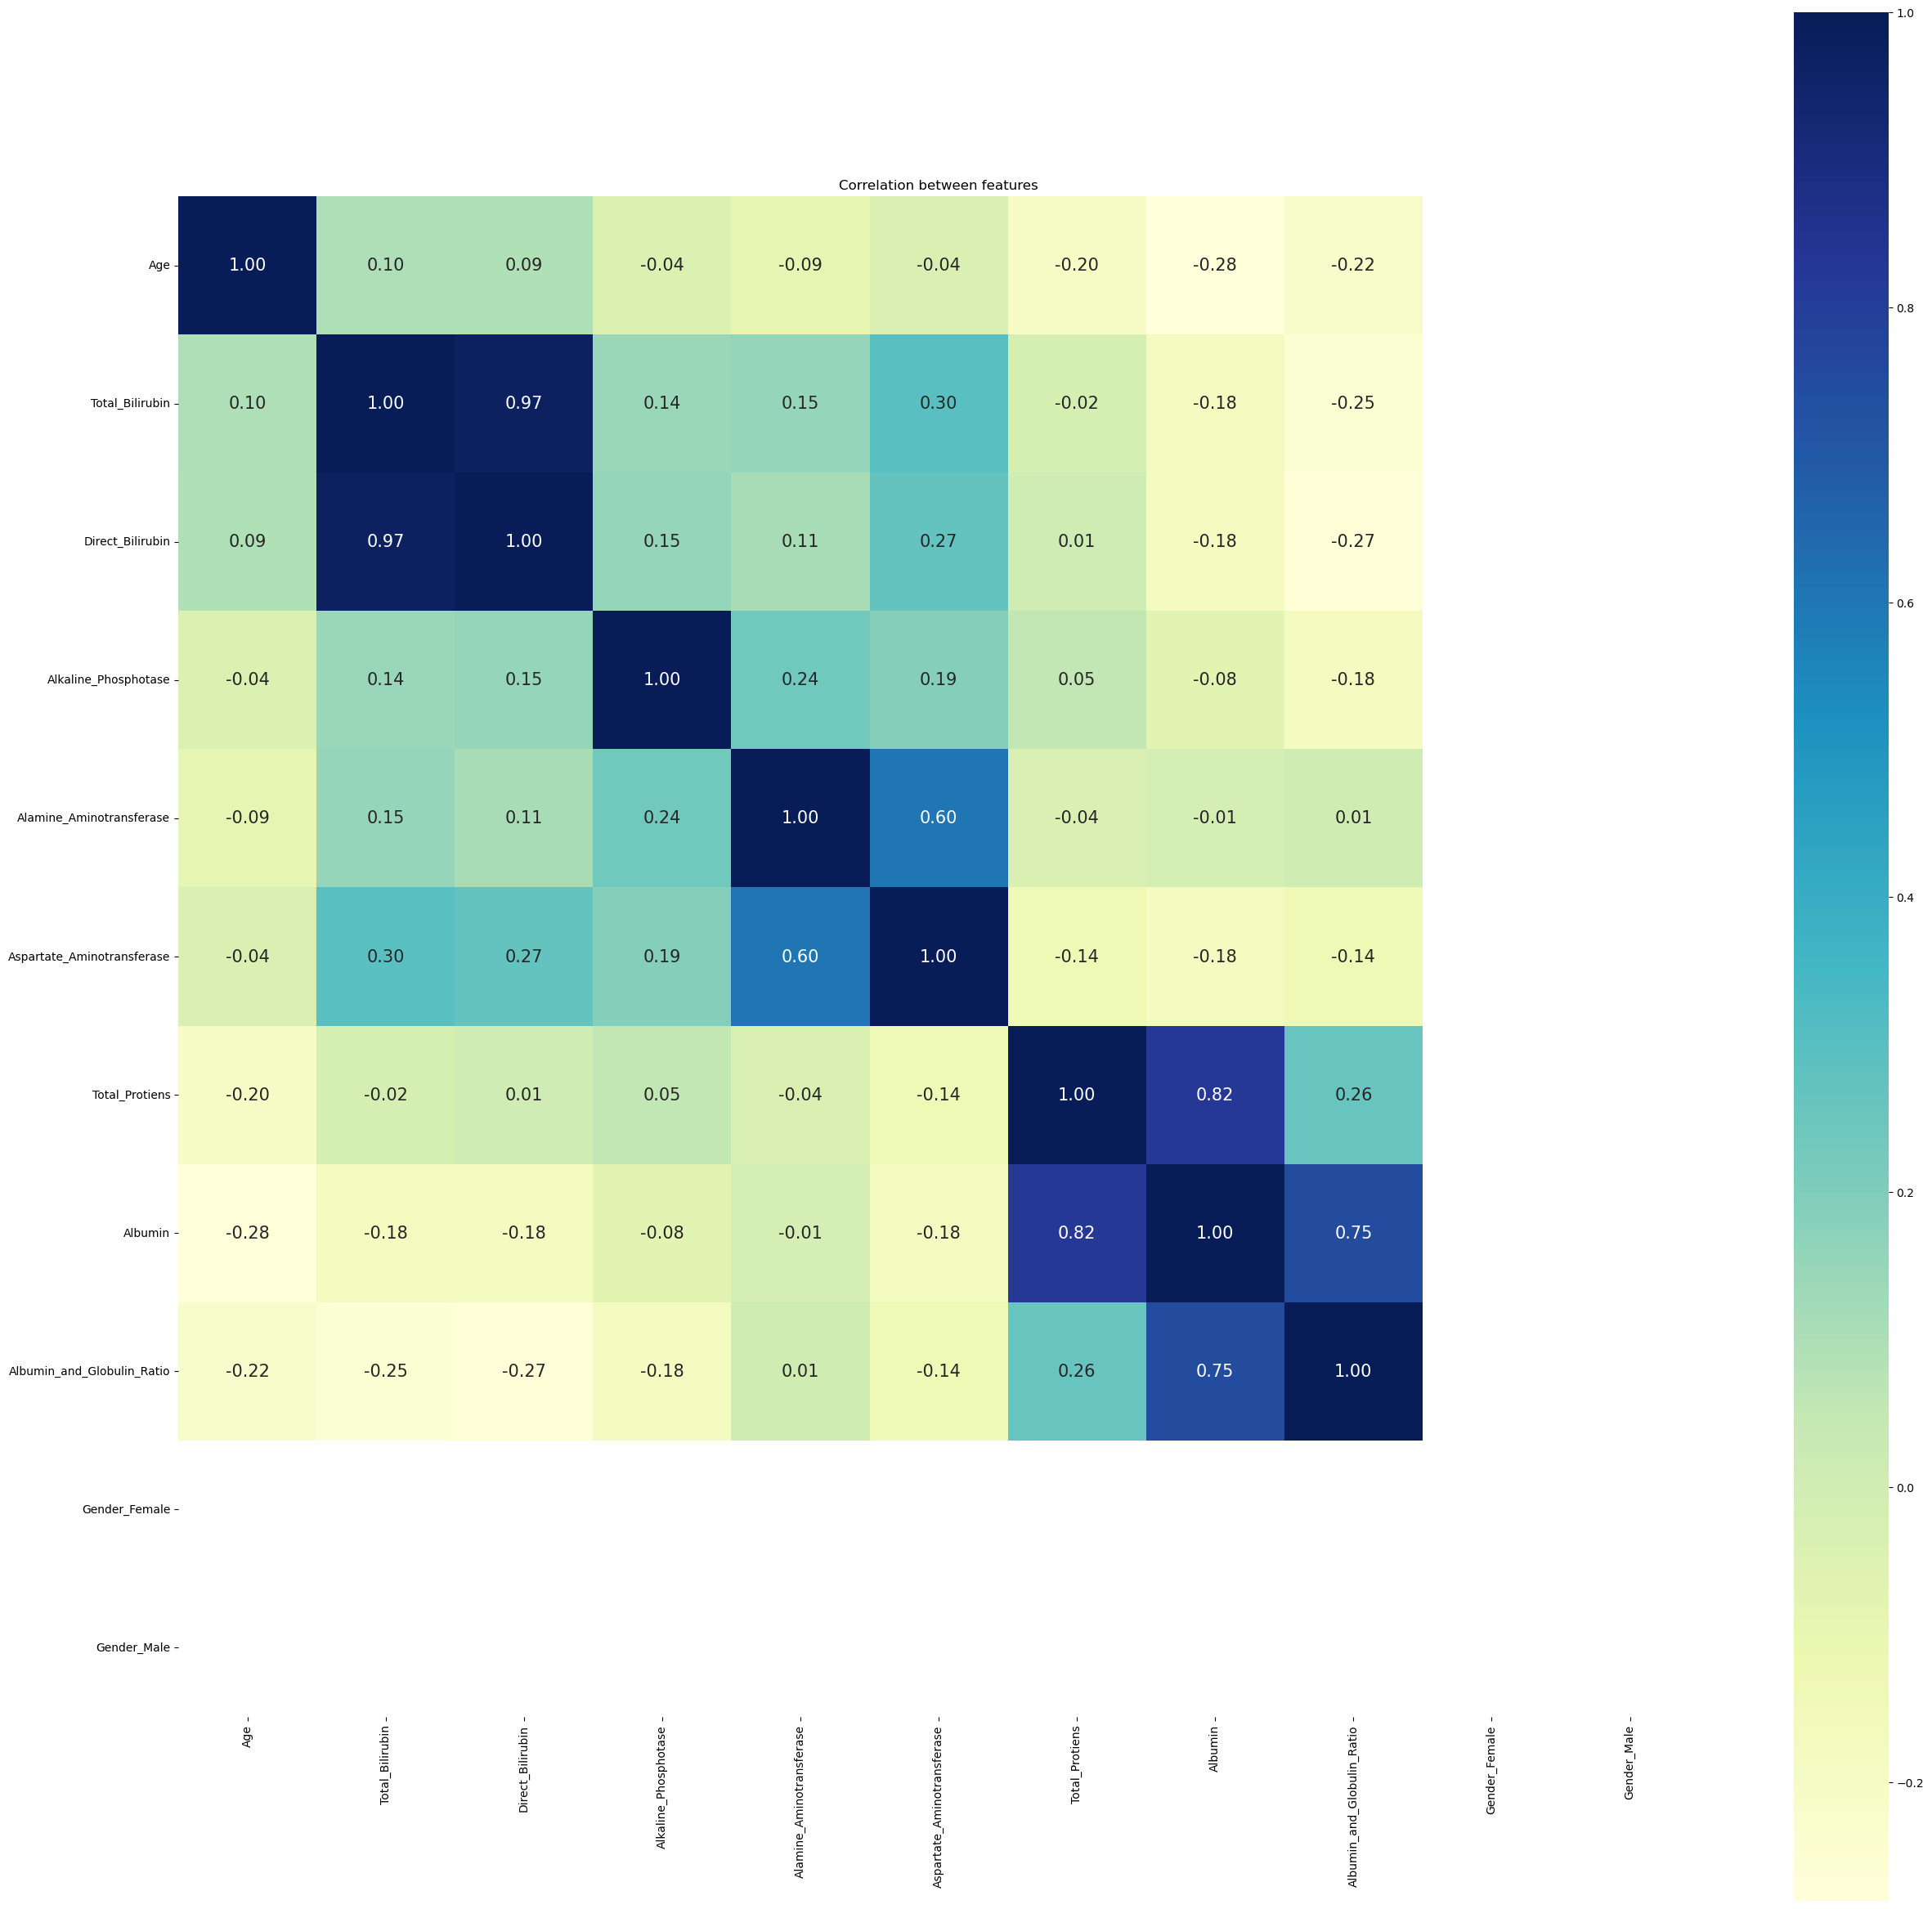

In [41]:
plt.figure(figsize=(30, 30))
sns.heatmap(liver_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'YlGnBu')
plt.title('Correlation between features');

In [42]:
#The above correlation also indicates the following correlation
#Total_Protiens & Albumin
#Alamine_Aminotransferase & Aspartate_Aminotransferase
#Direct_Bilirubin & Total_Bilirubin
#There is some correlation between Albumin_and_Globulin_Ratio and Albumin. But its not as high as Total_Protiens & Albumin

# Machine Learning

In [43]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable to binary values
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Use SMOTE to balance the data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [46]:
# Define XGBoost classifier
model = XGBClassifier()

# Define hyperparameters to tune
params = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'n_estimators': [100, 500, 1000],
    'gamma': [0, 0.1, 0.5, 1],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train_res, y_train_res)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
model = XGBClassifier(**best_params)
model.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy and test accuracy
accuracy = accuracy_score(y_test, y_pred)
test_accuracy = model.score(X_test, y_test)

# Print results
print('\nBest hyperparameters:', best_params)
print('Accuracy:', accuracy)
print('Test Accuracy:', test_accuracy)


Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
[CV 1/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5;, score=0.700 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7;, score=0.750 total time=   0.0s
[CV 5/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7;, score=0.650 total time=   0.0s
[CV 1/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1;, score=0.683 total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1;, score=0.600 total time=   0.0s
[CV 5/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1;, score=0.667 total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators

[CV 5/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.5, max_depth=7, n_estimators=1000, subsample=0.5;, score=0.750 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.5, max_depth=7, n_estimators=1000, subsample=0.7;, score=0.650 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.5, max_depth=9, n_estimators=100, subsample=0.7;, score=0.700 total time=   0.0s
[CV 4/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.5, max_depth=9, n_estimators=100, subsample=0.7;, score=0.800 total time=   0.0s
[CV 5/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.5, max_depth=9, n_estimators=500, subsample=0.5;, score=0.833 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.5, max_depth=9, n_estimators=500, subsample=0.7;, score=0.617 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.5, max_depth=9, n_estimators=1000, subsample=0.5;, score=0.800 total time=   0.1s
[CV 5/5] E

[CV 3/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=9, n_estimators=500, subsample=0.5;, score=0.700 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=9, n_estimators=500, subsample=0.5;, score=0.867 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=9, n_estimators=1000, subsample=0.5;, score=0.883 total time=   0.3s
[CV 5/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=9, n_estimators=1000, subsample=0.5;, score=0.717 total time=   0.3s
[CV 5/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1;, score=0.667 total time=   0.0s
[CV 1/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.5;, score=0.700 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.7;, score=0.717 total time=   0.1s
[CV 4/5] 

[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.5;, score=0.600 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.5;, score=0.633 total time=   0.0s
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.7;, score=0.683 total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.7;, score=0.617 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=1;, score=0.600 total time=   0.0s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=1;, score=0.717 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=500, subsample=0.5;, score=0.717 total time=   0

[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.7;, score=0.683 total time=   0.0s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.7;, score=0.767 total time=   0.0s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=1;, score=0.767 total time=   0.0s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=1;, score=0.683 total time=   0.0s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=500, subsample=0.7;, score=0.850 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=500, subsample=0.7;, score=0.717 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=1000, subsample=0.7;, score=0.700 total time=   

[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.7;, score=0.700 total time=   0.0s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.7;, score=0.733 total time=   0.0s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.7;, score=0.867 total time=   0.0s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.7;, score=0.733 total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.5;, score=0.683 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.5;, score=0.750 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=1000, subsample=0.5;, score=0.717 total time=   0.2

[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=1;, score=0.700 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=1;, score=0.850 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=1;, score=0.700 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=1;, score=0.650 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=1000, subsample=1;, score=0.767 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=1000, subsample=1;, score=0.750 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=1;, score=0.617 total time=   0.1s
[CV 3/5] 

[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.7;, score=0.667 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=1000, subsample=0.7;, score=0.867 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=1000, subsample=0.7;, score=0.717 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=500, subsample=0.5;, score=0.717 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=500, subsample=0.5;, score=0.867 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=1000, subsample=0.7;, score=0.683 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=1000, subsample=0.7;, score=0.617 total time=   

[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1;, score=0.700 total time=   0.0s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.7;, score=0.867 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.7;, score=0.700 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=1000, subsample=0.7;, score=0.733 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=1000, subsample=1;, score=0.700 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=1;, score=0.817 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=1;, score=0.733 total time=   0.1s
[CV 3

[CV 1/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=7, n_estimators=1000, subsample=0.5;, score=0.683 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=7, n_estimators=1000, subsample=0.5;, score=0.600 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.5;, score=0.617 total time=   0.0s
[CV 3/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.5;, score=0.767 total time=   0.0s
[CV 4/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.5;, score=0.867 total time=   0.0s
[CV 5/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.5;, score=0.800 total time=   0.0s
[CV 3/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.7;, score=0.733 total time=   0.

[CV 1/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=1000, subsample=0.7;, score=0.683 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=1000, subsample=0.7;, score=0.667 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.5;, score=0.650 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.5;, score=0.733 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=7, n_estimators=1000, subsample=0.5;, score=0.750 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=7, n_estimators=1000, subsample=0.5;, score=0.867 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.7;, score=0.700 total time=   

[CV 2/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.5, max_depth=3, n_estimators=500, subsample=1;, score=0.600 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.5, max_depth=3, n_estimators=500, subsample=1;, score=0.733 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.5, max_depth=3, n_estimators=1000, subsample=1;, score=0.733 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.5, max_depth=3, n_estimators=1000, subsample=1;, score=0.850 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.5, max_depth=5, n_estimators=500, subsample=0.7;, score=0.783 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.5, max_depth=5, n_estimators=500, subsample=0.7;, score=0.733 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.5, max_depth=5, n_estimators=1000, subsample=0.7;, score=0.733 total time=   0.2s
[CV 

[CV 1/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.5, max_depth=3, n_estimators=500, subsample=0.5;, score=0.617 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.5, max_depth=3, n_estimators=500, subsample=0.7;, score=0.750 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.5, max_depth=3, n_estimators=500, subsample=0.7;, score=0.783 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.5, max_depth=3, n_estimators=1000, subsample=0.7;, score=0.633 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.5, max_depth=3, n_estimators=1000, subsample=0.7;, score=0.783 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.5, max_depth=5, n_estimators=500, subsample=0.7;, score=0.583 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.5, max_depth=5, n_estimators=500, subsample=0.7;, score=0.717 total time=   0.

[CV 2/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=1, max_depth=9, n_estimators=500, subsample=0.5;, score=0.600 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=1, max_depth=9, n_estimators=500, subsample=1;, score=0.817 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=1, max_depth=9, n_estimators=1000, subsample=0.5;, score=0.617 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5;, score=0.700 total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5;, score=0.617 total time=   0.0s
[CV 5/5] END colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5;, score=0.667 total time=   0.0s
[CV 1/5] END colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7;, score=0.683 total time=   0.0s
[CV 1/5] E

[CV 1/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.5, max_depth=5, n_estimators=1000, subsample=0.5;, score=0.700 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.5, max_depth=7, n_estimators=100, subsample=0.5;, score=0.650 total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.5, max_depth=7, n_estimators=100, subsample=0.5;, score=0.600 total time=   0.0s
[CV 3/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.5, max_depth=7, n_estimators=100, subsample=0.5;, score=0.700 total time=   0.0s
[CV 4/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.5, max_depth=7, n_estimators=100, subsample=0.5;, score=0.867 total time=   0.0s
[CV 5/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.5, max_depth=7, n_estimators=100, subsample=0.5;, score=0.767 total time=   0.0s
[CV 1/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.5, max_depth=7, n_estimators=100, subsample=0.7;, score=0.683 total time=   0.0

[CV 4/5] END colsample_bytree=0.5, gamma=1, learning_rate=0.5, max_depth=7, n_estimators=1000, subsample=1;, score=0.833 total time=   0.3s
[CV 2/5] END colsample_bytree=0.5, gamma=1, learning_rate=0.5, max_depth=9, n_estimators=1000, subsample=0.5;, score=0.617 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, gamma=1, learning_rate=0.5, max_depth=9, n_estimators=1000, subsample=0.5;, score=0.767 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, gamma=1, learning_rate=1, max_depth=3, n_estimators=100, subsample=0.7;, score=0.617 total time=   0.0s
[CV 3/5] END colsample_bytree=0.5, gamma=1, learning_rate=1, max_depth=3, n_estimators=100, subsample=0.7;, score=0.667 total time=   0.0s
[CV 3/5] END colsample_bytree=0.5, gamma=1, learning_rate=1, max_depth=3, n_estimators=100, subsample=1;, score=0.733 total time=   0.0s
[CV 4/5] END colsample_bytree=0.5, gamma=1, learning_rate=1, max_depth=3, n_estimators=100, subsample=1;, score=0.783 total time=   0.0s
[CV 2/5] END colsample_b

[CV 1/5] END colsample_bytree=0.5, gamma=1, learning_rate=0.5, max_depth=7, n_estimators=1000, subsample=0.7;, score=0.600 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, gamma=1, learning_rate=0.5, max_depth=9, n_estimators=100, subsample=0.7;, score=0.650 total time=   0.0s
[CV 4/5] END colsample_bytree=0.5, gamma=1, learning_rate=0.5, max_depth=9, n_estimators=100, subsample=0.7;, score=0.850 total time=   0.0s
[CV 4/5] END colsample_bytree=0.5, gamma=1, learning_rate=0.5, max_depth=9, n_estimators=100, subsample=1;, score=0.733 total time=   0.0s
[CV 5/5] END colsample_bytree=0.5, gamma=1, learning_rate=0.5, max_depth=9, n_estimators=100, subsample=1;, score=0.833 total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, gamma=1, learning_rate=0.5, max_depth=9, n_estimators=500, subsample=0.7;, score=0.567 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, gamma=1, learning_rate=0.5, max_depth=9, n_estimators=500, subsample=0.7;, score=0.667 total time=   0.1s
[CV 3/5] END col

[CV 2/5] END colsample_bytree=0.5, gamma=1, learning_rate=1, max_depth=7, n_estimators=100, subsample=0.7;, score=0.617 total time=   0.0s
[CV 3/5] END colsample_bytree=0.5, gamma=1, learning_rate=1, max_depth=7, n_estimators=100, subsample=0.7;, score=0.733 total time=   0.0s
[CV 3/5] END colsample_bytree=0.5, gamma=1, learning_rate=1, max_depth=7, n_estimators=100, subsample=1;, score=0.700 total time=   0.0s
[CV 4/5] END colsample_bytree=0.5, gamma=1, learning_rate=1, max_depth=7, n_estimators=100, subsample=1;, score=0.783 total time=   0.0s
[CV 4/5] END colsample_bytree=0.5, gamma=1, learning_rate=1, max_depth=7, n_estimators=500, subsample=0.5;, score=0.800 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, gamma=1, learning_rate=1, max_depth=7, n_estimators=500, subsample=0.5;, score=0.733 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, gamma=1, learning_rate=1, max_depth=7, n_estimators=1000, subsample=0.5;, score=0.683 total time=   0.2s
[CV 4/5] END colsample_bytree=

[CV 2/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=1;, score=0.633 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=1;, score=0.767 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=1000, subsample=1;, score=0.683 total time=   0.5s
[CV 1/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.5;, score=0.650 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.7;, score=0.650 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=1;, score=0.633 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=9, n_estimators=500, subsample=0.5;, score=0.683 total time=   0.2s
[CV 2/5] END 

[CV 5/5] END colsample_bytree=0.5, gamma=1, learning_rate=1, max_depth=5, n_estimators=1000, subsample=1;, score=0.783 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, gamma=1, learning_rate=1, max_depth=7, n_estimators=1000, subsample=0.5;, score=0.500 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, gamma=1, learning_rate=1, max_depth=7, n_estimators=1000, subsample=0.5;, score=0.700 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, gamma=1, learning_rate=1, max_depth=9, n_estimators=100, subsample=0.5;, score=0.700 total time=   0.0s
[CV 3/5] END colsample_bytree=0.5, gamma=1, learning_rate=1, max_depth=9, n_estimators=100, subsample=0.5;, score=0.717 total time=   0.0s
[CV 1/5] END colsample_bytree=0.5, gamma=1, learning_rate=1, max_depth=9, n_estimators=100, subsample=0.7;, score=0.583 total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, gamma=1, learning_rate=1, max_depth=9, n_estimators=100, subsample=0.7;, score=0.667 total time=   0.0s
[CV 5/5] END colsample_byt

[CV 4/5] END colsample_bytree=0.5, gamma=1, learning_rate=1, max_depth=7, n_estimators=500, subsample=1;, score=0.783 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, gamma=1, learning_rate=1, max_depth=7, n_estimators=500, subsample=1;, score=0.750 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, gamma=1, learning_rate=1, max_depth=7, n_estimators=1000, subsample=1;, score=0.750 total time=   0.3s
[CV 1/5] END colsample_bytree=0.5, gamma=1, learning_rate=1, max_depth=9, n_estimators=100, subsample=0.5;, score=0.533 total time=   0.0s
[CV 1/5] END colsample_bytree=0.5, gamma=1, learning_rate=1, max_depth=9, n_estimators=500, subsample=1;, score=0.600 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, gamma=1, learning_rate=1, max_depth=9, n_estimators=500, subsample=1;, score=0.600 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, gamma=1, learning_rate=1, max_depth=9, n_estimators=1000, subsample=1;, score=0.600 total time=   0.3s
[CV 3/5] END colsample_bytree=0.5, ga

[CV 4/5] END colsample_bytree=0.5, gamma=1, learning_rate=1, max_depth=5, n_estimators=500, subsample=0.7;, score=0.783 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, gamma=1, learning_rate=1, max_depth=5, n_estimators=500, subsample=0.7;, score=0.717 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, gamma=1, learning_rate=1, max_depth=5, n_estimators=1000, subsample=0.7;, score=0.650 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, gamma=1, learning_rate=1, max_depth=5, n_estimators=1000, subsample=0.7;, score=0.567 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, gamma=1, learning_rate=1, max_depth=7, n_estimators=500, subsample=0.7;, score=0.600 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, gamma=1, learning_rate=1, max_depth=7, n_estimators=500, subsample=0.7;, score=0.633 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, gamma=1, learning_rate=1, max_depth=7, n_estimators=1000, subsample=0.5;, score=0.733 total time=   0.2s
[CV 1/5] END colsample_b

[CV 5/5] END colsample_bytree=0.7, gamma=0, learning_rate=1, max_depth=7, n_estimators=500, subsample=0.5;, score=0.700 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0, learning_rate=1, max_depth=7, n_estimators=1000, subsample=0.7;, score=0.600 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, gamma=0, learning_rate=1, max_depth=7, n_estimators=1000, subsample=0.7;, score=0.700 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, gamma=0, learning_rate=1, max_depth=9, n_estimators=100, subsample=1;, score=0.783 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0, learning_rate=1, max_depth=9, n_estimators=100, subsample=1;, score=0.733 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0, learning_rate=1, max_depth=9, n_estimators=500, subsample=1;, score=0.750 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0, learning_rate=1, max_depth=9, n_estimators=1000, subsample=0.5;, score=0.600 total time=   0.1s
[CV 1/5] END colsample_bytree=

[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.5;, score=0.733 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.5;, score=0.833 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7;, score=0.683 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1;, score=0.683 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.7;, score=0.850 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.7;, score=0.683 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=0.7;, score=0.733 total time

[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.7;, score=0.600 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.7;, score=0.667 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.7;, score=0.817 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.7;, score=0.750 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1;, score=0.767 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1;, score=0.800 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.5;, score=0.833 total time=   0.1s
[CV

[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=1000, subsample=0.5;, score=0.717 total time=   0.3s
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1;, score=0.633 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1;, score=0.633 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1;, score=0.650 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.5;, score=0.667 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.7;, score=0.683 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.7;, score=0.633 total time=   0.1s
[CV

[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.5;, score=0.850 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.5;, score=0.717 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=1000, subsample=0.5;, score=0.733 total time=   0.3s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=1000, subsample=0.5;, score=0.850 total time=   0.4s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.7;, score=0.650 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=1;, score=0.633 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=500, subsample=0.5;, score=0.733 total time=

[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.7;, score=0.717 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.7;, score=0.817 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=0.7;, score=0.833 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=0.7;, score=0.683 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.5;, score=0.617 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.5;, score=0.667 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=1000, subsample=0.5;, score=0.633 total time=   0

[CV 1/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.5;, score=0.667 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=7, n_estimators=1000, subsample=0.5;, score=0.683 total time=   0.3s
[CV 2/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=7, n_estimators=1000, subsample=0.5;, score=0.633 total time=   0.3s
[CV 2/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.5;, score=0.650 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.5;, score=0.650 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.5;, score=0.800 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.5;, score=0.650 total tim

[CV 5/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=1;, score=0.633 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=1;, score=0.683 total time=   0.3s
[CV 1/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5;, score=0.667 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5;, score=0.633 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5;, score=0.667 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7;, score=0.667 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1;, score=0.650 total time=   0.

[CV 5/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.7;, score=0.700 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=1;, score=0.683 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=0.7;, score=0.617 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=0.7;, score=0.733 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=1;, score=0.667 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=1;, score=0.633 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=1000, subsample=1;, score=0.633 total time=   0.3s
[CV 

[CV 2/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.1, max_depth=9, n_estimators=1000, subsample=1;, score=0.550 total time=   0.4s
[CV 3/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.1, max_depth=9, n_estimators=1000, subsample=1;, score=0.750 total time=   0.4s
[CV 5/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.5, max_depth=3, n_estimators=1000, subsample=0.5;, score=0.783 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.5, max_depth=3, n_estimators=1000, subsample=0.7;, score=0.650 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.5, max_depth=5, n_estimators=100, subsample=1;, score=0.600 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.5, max_depth=5, n_estimators=100, subsample=1;, score=0.717 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.5, max_depth=5, n_estimators=500, subsample=0.5;, score=0.817 total time=   0.1s
[CV

[CV 5/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.5, max_depth=5, n_estimators=1000, subsample=1;, score=0.717 total time=   0.3s
[CV 4/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.5, max_depth=7, n_estimators=500, subsample=1;, score=0.717 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.5, max_depth=7, n_estimators=500, subsample=1;, score=0.700 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.5, max_depth=7, n_estimators=1000, subsample=1;, score=0.700 total time=   0.4s
[CV 1/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.5, max_depth=9, n_estimators=100, subsample=0.5;, score=0.650 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.5, max_depth=9, n_estimators=500, subsample=0.7;, score=0.833 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.5, max_depth=9, n_estimators=500, subsample=0.7;, score=0.700 total time=   0.2s
[CV 3

[CV 3/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.5, max_depth=3, n_estimators=500, subsample=0.7;, score=0.750 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.5, max_depth=3, n_estimators=500, subsample=0.7;, score=0.800 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.5, max_depth=3, n_estimators=1000, subsample=1;, score=0.650 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.5, max_depth=5, n_estimators=100, subsample=0.5;, score=0.667 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.5, max_depth=5, n_estimators=100, subsample=0.5;, score=0.800 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.5, max_depth=5, n_estimators=100, subsample=0.5;, score=0.833 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.5, max_depth=5, n_estimators=100, subsample=0.7;, score=0.767 total time=   0.0s


[CV 5/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.5, max_depth=5, n_estimators=1000, subsample=0.5;, score=0.817 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.5, max_depth=7, n_estimators=100, subsample=1;, score=0.600 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.5, max_depth=7, n_estimators=100, subsample=1;, score=0.633 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.5, max_depth=7, n_estimators=500, subsample=0.5;, score=0.600 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.5, max_depth=7, n_estimators=500, subsample=0.5;, score=0.750 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.5, max_depth=7, n_estimators=1000, subsample=0.5;, score=0.767 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.5, max_depth=7, n_estimators=1000, subsample=0.5;, score=0.850 total time=   0.2s


[CV 1/5] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.5;, score=0.633 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.7;, score=0.733 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.7;, score=0.833 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=9, n_estimators=500, subsample=0.5;, score=0.733 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=9, n_estimators=500, subsample=0.5;, score=0.817 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=9, n_estimators=1000, subsample=0.5;, score=0.833 total time=   0.3s
[CV 5/5] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=9, n_estimators=1000, subsample=0.5;, score=0.767 total time=   0.3s
[CV 4/5] EN

[CV 5/5] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.5;, score=0.717 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.7;, score=0.683 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.7;, score=0.633 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.7;, score=0.750 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.7;, score=0.850 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.7;, score=0.733 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1;, score=0.667 total time=   0.0s
[CV 1/5] END co

[CV 4/5] END colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=0.7;, score=0.867 total time=   0.3s
[CV 2/5] END colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=1;, score=0.617 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=1;, score=0.767 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=7, n_estimators=1000, subsample=0.7;, score=0.850 total time=   0.5s
[CV 5/5] END colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=7, n_estimators=1000, subsample=0.7;, score=0.700 total time=   0.5s
[CV 4/5] END colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=9, n_estimators=500, subsample=0.7;, score=0.867 total time=   0.3s
[CV 5/5] END colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=9, n_estimators=500, subsample=0.7;, score=0.700 total time=   0.2s
[CV 5/5

[CV 1/5] END colsample_bytree=0.7, gamma=1, learning_rate=1, max_depth=7, n_estimators=100, subsample=0.7;, score=0.550 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=1, learning_rate=1, max_depth=7, n_estimators=100, subsample=0.7;, score=0.583 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=1, learning_rate=1, max_depth=7, n_estimators=100, subsample=0.7;, score=0.683 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=1, learning_rate=1, max_depth=7, n_estimators=100, subsample=1;, score=0.650 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=1, learning_rate=1, max_depth=7, n_estimators=100, subsample=1;, score=0.800 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=1, learning_rate=1, max_depth=7, n_estimators=500, subsample=0.5;, score=0.783 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=1, learning_rate=1, max_depth=7, n_estimators=500, subsample=0.5;, score=0.767 total time=   0.1s
[CV 5/5] END colsample_bytree=0

[CV 1/5] END colsample_bytree=0.7, gamma=1, learning_rate=1, max_depth=7, n_estimators=100, subsample=1;, score=0.633 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=1, learning_rate=1, max_depth=7, n_estimators=100, subsample=1;, score=0.567 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=1, learning_rate=1, max_depth=7, n_estimators=500, subsample=0.5;, score=0.567 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=1, learning_rate=1, max_depth=7, n_estimators=500, subsample=0.5;, score=0.600 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=1, learning_rate=1, max_depth=7, n_estimators=1000, subsample=0.5;, score=0.633 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, gamma=1, learning_rate=1, max_depth=7, n_estimators=1000, subsample=0.5;, score=0.800 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, gamma=1, learning_rate=1, max_depth=9, n_estimators=100, subsample=0.5;, score=0.650 total time=   0.0s
[CV 3/5] END colsample_bytree

[CV 3/5] END colsample_bytree=0.7, gamma=1, learning_rate=1, max_depth=7, n_estimators=500, subsample=1;, score=0.683 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, gamma=1, learning_rate=1, max_depth=7, n_estimators=1000, subsample=1;, score=0.683 total time=   0.4s
[CV 4/5] END colsample_bytree=0.7, gamma=1, learning_rate=1, max_depth=7, n_estimators=1000, subsample=1;, score=0.800 total time=   0.4s
[CV 5/5] END colsample_bytree=0.7, gamma=1, learning_rate=1, max_depth=9, n_estimators=1000, subsample=0.7;, score=0.783 total time=   0.3s
[CV 1/5] END colsample_bytree=0.7, gamma=1, learning_rate=1, max_depth=9, n_estimators=1000, subsample=1;, score=0.617 total time=   0.4s
[CV 2/5] END colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=1;, score=0.633 total time=   0.2s
[CV 3/5] END colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=1;, score=0.667 total time=   0.1s
[CV 3/5] END colsample_bytree=1, 

[CV 1/5] END colsample_bytree=0.7, gamma=1, learning_rate=1, max_depth=9, n_estimators=500, subsample=1;, score=0.617 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, gamma=1, learning_rate=1, max_depth=9, n_estimators=500, subsample=1;, score=0.683 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, gamma=1, learning_rate=1, max_depth=9, n_estimators=1000, subsample=1;, score=0.683 total time=   0.3s
[CV 3/5] END colsample_bytree=0.7, gamma=1, learning_rate=1, max_depth=9, n_estimators=1000, subsample=1;, score=0.733 total time=   0.4s
[CV 5/5] END colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.5;, score=0.717 total time=   0.3s
[CV 1/5] END colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.7;, score=0.700 total time=   0.3s
[CV 3/5] END colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7;, score=0.733 total time=   0.1s
[CV 4/5] END colsample_bytre

[CV 1/5] END colsample_bytree=1, gamma=0, learning_rate=1, max_depth=3, n_estimators=500, subsample=0.7;, score=0.600 total time=   0.1s
[CV 2/5] END colsample_bytree=1, gamma=0, learning_rate=1, max_depth=3, n_estimators=500, subsample=0.7;, score=0.600 total time=   0.1s
[CV 2/5] END colsample_bytree=1, gamma=0, learning_rate=1, max_depth=3, n_estimators=1000, subsample=0.7;, score=0.600 total time=   0.2s
[CV 3/5] END colsample_bytree=1, gamma=0, learning_rate=1, max_depth=3, n_estimators=1000, subsample=0.7;, score=0.683 total time=   0.2s
[CV 4/5] END colsample_bytree=1, gamma=0, learning_rate=1, max_depth=5, n_estimators=100, subsample=1;, score=0.817 total time=   0.0s
[CV 5/5] END colsample_bytree=1, gamma=0, learning_rate=1, max_depth=5, n_estimators=100, subsample=1;, score=0.733 total time=   0.0s
[CV 5/5] END colsample_bytree=1, gamma=0, learning_rate=1, max_depth=5, n_estimators=500, subsample=1;, score=0.750 total time=   0.1s
[CV 1/5] END colsample_bytree=1, gamma=0, lea

[CV 3/5] END colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=9, n_estimators=1000, subsample=0.5;, score=0.750 total time=   0.3s
[CV 1/5] END colsample_bytree=1, gamma=0, learning_rate=0.5, max_depth=3, n_estimators=100, subsample=1;, score=0.717 total time=   0.0s
[CV 2/5] END colsample_bytree=1, gamma=0, learning_rate=0.5, max_depth=3, n_estimators=100, subsample=1;, score=0.600 total time=   0.0s
[CV 5/5] END colsample_bytree=1, gamma=0, learning_rate=0.5, max_depth=3, n_estimators=100, subsample=1;, score=0.700 total time=   0.0s
[CV 1/5] END colsample_bytree=1, gamma=0, learning_rate=0.5, max_depth=3, n_estimators=500, subsample=0.5;, score=0.517 total time=   0.1s
[CV 2/5] END colsample_bytree=1, gamma=0, learning_rate=0.5, max_depth=3, n_estimators=500, subsample=1;, score=0.583 total time=   0.1s
[CV 3/5] END colsample_bytree=1, gamma=0, learning_rate=0.5, max_depth=3, n_estimators=500, subsample=1;, score=0.717 total time=   0.1s
[CV 3/5] END colsample_bytree=1, gam

[CV 1/5] END colsample_bytree=1, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=100, subsample=0.7;, score=0.667 total time=   0.0s
[CV 2/5] END colsample_bytree=1, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=100, subsample=0.7;, score=0.633 total time=   0.0s
[CV 1/5] END colsample_bytree=1, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=500, subsample=0.5;, score=0.683 total time=   0.1s
[CV 2/5] END colsample_bytree=1, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=500, subsample=0.5;, score=0.567 total time=   0.1s
[CV 4/5] END colsample_bytree=1, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=1000, subsample=0.5;, score=0.883 total time=   0.2s
[CV 5/5] END colsample_bytree=1, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=1000, subsample=0.5;, score=0.767 total time=   0.2s
[CV 1/5] END colsample_bytree=1, gamma=0, learning_rate=0.5, max_depth=7, n_estimators=100, subsample=1;, score=0.667 total time=   0.0s
[CV 2/5] END colsample_bytr

[CV 3/5] END colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=1000, subsample=0.5;, score=0.750 total time=   0.5s
[CV 4/5] END colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=1000, subsample=0.5;, score=0.817 total time=   0.5s
[CV 4/5] END colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=1;, score=0.650 total time=   0.1s
[CV 5/5] END colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=1;, score=0.717 total time=   0.1s
[CV 2/5] END colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=500, subsample=0.7;, score=0.667 total time=   0.3s
[CV 3/5] END colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=500, subsample=0.7;, score=0.750 total time=   0.3s
[CV 3/5] END colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=1000, subsample=0.7;, score=0.750 total time=   0.5s
[CV 4/5

[CV 3/5] END colsample_bytree=1, gamma=0, learning_rate=1, max_depth=7, n_estimators=100, subsample=1;, score=0.750 total time=   0.0s
[CV 4/5] END colsample_bytree=1, gamma=0, learning_rate=1, max_depth=7, n_estimators=100, subsample=1;, score=0.750 total time=   0.0s
[CV 4/5] END colsample_bytree=1, gamma=0, learning_rate=1, max_depth=7, n_estimators=500, subsample=1;, score=0.767 total time=   0.1s
[CV 5/5] END colsample_bytree=1, gamma=0, learning_rate=1, max_depth=7, n_estimators=500, subsample=1;, score=0.733 total time=   0.1s
[CV 5/5] END colsample_bytree=1, gamma=0, learning_rate=1, max_depth=7, n_estimators=1000, subsample=1;, score=0.733 total time=   0.2s
[CV 1/5] END colsample_bytree=1, gamma=0, learning_rate=1, max_depth=9, n_estimators=100, subsample=0.5;, score=0.617 total time=   0.0s
[CV 2/5] END colsample_bytree=1, gamma=0, learning_rate=1, max_depth=9, n_estimators=100, subsample=0.5;, score=0.550 total time=   0.0s
[CV 3/5] END colsample_bytree=1, gamma=0, learning

[CV 3/5] END colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.7;, score=0.717 total time=   0.0s
[CV 4/5] END colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.7;, score=0.783 total time=   0.1s
[CV 1/5] END colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.5;, score=0.683 total time=   0.2s
[CV 2/5] END colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.5;, score=0.667 total time=   0.2s
[CV 2/5] END colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=1000, subsample=0.5;, score=0.633 total time=   0.3s
[CV 3/5] END colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=1000, subsample=0.5;, score=0.733 total time=   0.3s
[CV 4/5] END colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.7;, score=0.817 total time=   0.1s
[CV 5/5] EN

[CV 5/5] END colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=1000, subsample=1;, score=0.683 total time=   0.5s
[CV 1/5] END colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.5;, score=0.750 total time=   0.0s
[CV 1/5] END colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.7;, score=0.717 total time=   0.1s
[CV 2/5] END colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.7;, score=0.650 total time=   0.1s
[CV 5/5] END colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.7;, score=0.717 total time=   0.1s
[CV 1/5] END colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=1;, score=0.600 total time=   0.1s
[CV 3/5] END colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=500, subsample=0.5;, score=0.767 total time=   0.2s
[CV 4/5] 

[CV 3/5] END colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=1000, subsample=1;, score=0.733 total time=   0.4s
[CV 1/5] END colsample_bytree=1, gamma=0.1, learning_rate=0.5, max_depth=3, n_estimators=1000, subsample=0.5;, score=0.567 total time=   0.2s
[CV 2/5] END colsample_bytree=1, gamma=0.1, learning_rate=0.5, max_depth=3, n_estimators=1000, subsample=0.5;, score=0.633 total time=   0.2s
[CV 2/5] END colsample_bytree=1, gamma=0.1, learning_rate=0.5, max_depth=5, n_estimators=100, subsample=0.5;, score=0.617 total time=   0.0s
[CV 3/5] END colsample_bytree=1, gamma=0.1, learning_rate=0.5, max_depth=5, n_estimators=100, subsample=0.5;, score=0.767 total time=   0.0s
[CV 3/5] END colsample_bytree=1, gamma=0.1, learning_rate=0.5, max_depth=5, n_estimators=100, subsample=0.7;, score=0.717 total time=   0.0s
[CV 4/5] END colsample_bytree=1, gamma=0.1, learning_rate=0.5, max_depth=5, n_estimators=100, subsample=0.7;, score=0.783 total time=   0.0s
[CV 3/5] END

[CV 3/5] END colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=0.5;, score=0.717 total time=   0.4s
[CV 4/5] END colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=0.5;, score=0.817 total time=   0.3s
[CV 1/5] END colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.7;, score=0.733 total time=   0.0s
[CV 2/5] END colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.7;, score=0.650 total time=   0.0s
[CV 4/5] END colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1;, score=0.817 total time=   0.1s
[CV 5/5] END colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1;, score=0.717 total time=   0.1s
[CV 3/5] END colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=1;, score=0.717 total time=   0.2s
[CV 4/5] END cols

[CV 1/5] END colsample_bytree=1, gamma=0.1, learning_rate=1, max_depth=3, n_estimators=100, subsample=1;, score=0.683 total time=   0.0s
[CV 2/5] END colsample_bytree=1, gamma=0.1, learning_rate=1, max_depth=3, n_estimators=100, subsample=1;, score=0.617 total time=   0.0s
[CV 4/5] END colsample_bytree=1, gamma=0.1, learning_rate=1, max_depth=3, n_estimators=500, subsample=0.5;, score=0.817 total time=   0.1s
[CV 5/5] END colsample_bytree=1, gamma=0.1, learning_rate=1, max_depth=3, n_estimators=500, subsample=0.5;, score=0.717 total time=   0.1s
[CV 1/5] END colsample_bytree=1, gamma=0.1, learning_rate=1, max_depth=3, n_estimators=1000, subsample=0.5;, score=0.700 total time=   0.2s
[CV 2/5] END colsample_bytree=1, gamma=0.1, learning_rate=1, max_depth=3, n_estimators=1000, subsample=0.5;, score=0.550 total time=   0.2s
[CV 2/5] END colsample_bytree=1, gamma=0.1, learning_rate=1, max_depth=5, n_estimators=100, subsample=0.5;, score=0.550 total time=   0.0s
[CV 3/5] END colsample_bytree

[CV 5/5] END colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=1;, score=0.683 total time=   0.4s
[CV 1/5] END colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5;, score=0.767 total time=   0.1s
[CV 4/5] END colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5;, score=0.783 total time=   0.0s
[CV 5/5] END colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5;, score=0.633 total time=   0.1s
[CV 5/5] END colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.5;, score=0.667 total time=   0.2s
[CV 1/5] END colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.7;, score=0.700 total time=   0.3s
[CV 1/5] END colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=0.7;, score=0.717 total time=   0.5s
[CV 2/

[CV 5/5] END colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1;, score=0.650 total time=   0.0s
[CV 1/5] END colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.5;, score=0.683 total time=   0.2s
[CV 5/5] END colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.7;, score=0.667 total time=   0.2s
[CV 1/5] END colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=1;, score=0.700 total time=   0.2s
[CV 1/5] END colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=1;, score=0.733 total time=   0.4s
[CV 2/5] END colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=1;, score=0.617 total time=   0.4s
[CV 2/5] END colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.7;, score=0.650 total time=   0.3s
[CV 3/5] END


Best hyperparameters: {'colsample_bytree': 0.5, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.5}
Accuracy: 0.6379310344827587
Test Accuracy: 0.6379310344827587
[CV 4/5] END colsample_bytree=1, gamma=0.5, learning_rate=0.5, max_depth=9, n_estimators=100, subsample=1;, score=0.800 total time=   0.1s
[CV 5/5] END colsample_bytree=1, gamma=0.5, learning_rate=0.5, max_depth=9, n_estimators=100, subsample=1;, score=0.683 total time=   0.0s
[CV 4/5] END colsample_bytree=1, gamma=0.5, learning_rate=0.5, max_depth=9, n_estimators=500, subsample=0.7;, score=0.783 total time=   0.2s
[CV 5/5] END colsample_bytree=1, gamma=0.5, learning_rate=0.5, max_depth=9, n_estimators=500, subsample=0.7;, score=0.733 total time=   0.2s
[CV 4/5] END colsample_bytree=1, gamma=0.5, learning_rate=0.5, max_depth=9, n_estimators=1000, subsample=0.5;, score=0.817 total time=   0.3s
[CV 5/5] END colsample_bytree=1, gamma=0.5, learning_rate=0.5, max_depth=9, n_estimators=1000, s

[CV 5/5] END colsample_bytree=1, gamma=0.5, learning_rate=0.5, max_depth=5, n_estimators=100, subsample=1;, score=0.733 total time=   0.0s
[CV 5/5] END colsample_bytree=1, gamma=0.5, learning_rate=0.5, max_depth=5, n_estimators=500, subsample=1;, score=0.733 total time=   0.2s
[CV 1/5] END colsample_bytree=1, gamma=0.5, learning_rate=0.5, max_depth=5, n_estimators=1000, subsample=0.5;, score=0.633 total time=   0.3s
[CV 1/5] END colsample_bytree=1, gamma=0.5, learning_rate=0.5, max_depth=7, n_estimators=100, subsample=0.5;, score=0.717 total time=   0.0s
[CV 2/5] END colsample_bytree=1, gamma=0.5, learning_rate=0.5, max_depth=7, n_estimators=100, subsample=0.5;, score=0.567 total time=   0.0s
[CV 3/5] END colsample_bytree=1, gamma=0.5, learning_rate=0.5, max_depth=7, n_estimators=100, subsample=0.5;, score=0.717 total time=   0.0s
[CV 4/5] END colsample_bytree=1, gamma=0.5, learning_rate=0.5, max_depth=7, n_estimators=100, subsample=0.5;, score=0.783 total time=   0.0s
[CV 5/5] END col

[CV 4/5] END colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.5;, score=0.850 total time=   0.0s
[CV 5/5] END colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.5;, score=0.650 total time=   0.1s
[CV 2/5] END colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1;, score=0.600 total time=   0.1s
[CV 3/5] END colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1;, score=0.717 total time=   0.0s
[CV 1/5] END colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=1;, score=0.667 total time=   0.2s
[CV 2/5] END colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=1;, score=0.600 total time=   0.2s
[CV 5/5] END colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=1000, subsample=0.7;, score=0.717 total time=   0.4s
[CV 1/5] END colsample_bytree=1, g

In [47]:
from imblearn.combine import SMOTEENN 
# SMOTEENN 
smoteenn = SMOTEENN(random_state=42) 
X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train, y_train)

# Define XGBoost classifier
model = XGBClassifier()

# Define hyperparameters to tune
params = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'n_estimators': [100, 500, 1000],
    'gamma': [0, 0.1, 0.5, 1],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train_smoteenn, y_train_smoteenn)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
model = XGBClassifier(**best_params)
model.fit(X_train_smoteenn, y_train_smoteenn)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy and test accuracy
accuracy = accuracy_score(y_test, y_pred)
test_accuracy = model.score(X_test, y_test)

# Print results
print('\nBest hyperparameters:', best_params)
print('Accuracy:', accuracy)
print('Test Accuracy:', test_accuracy)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
[CV 3/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5;, score=0.870 total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.5;, score=0.957 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.7;, score=0.955 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.7;, score=0.913 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=1;, score=0.957 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.5;, score=0.913 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_esti

[CV 4/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5;, score=0.864 total time=   0.0s
[CV 4/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1;, score=0.955 total time=   0.0s
[CV 5/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.5;, score=1.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=1;, score=0.957 total time=   0.0s
[CV 3/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.5;, score=0.870 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.7;, score=1.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1;, score=0.955 total time=   0.0s
[CV 5/5] E

[CV 5/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5;, score=1.000 total time=   0.0s
[CV 1/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1;, score=0.913 total time=   0.0s
[CV 1/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.7;, score=0.957 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=1;, score=0.955 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.5;, score=1.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=1;, score=0.955 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.7;, score=0.957 total time=   0.1s
[CV 3/5] E

[CV 2/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5;, score=0.957 total time=   0.0s
[CV 5/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1;, score=1.000 total time=   0.0s
[CV 3/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.7;, score=0.913 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.5;, score=0.913 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.7;, score=0.955 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5;, score=0.909 total time=   0.0s
[CV 5/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5;, score=1.000 total time=   0.0s
[CV 3/

[CV 1/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7;, score=0.826 total time=   0.0s
[CV 5/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7;, score=1.000 total time=   0.0s
[CV 3/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.5;, score=0.870 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=1;, score=0.957 total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.5;, score=0.957 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=1;, score=0.957 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.5;, score=1.000 total time=   0.1s
[CV 1/5]

[CV 2/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7;, score=1.000 total time=   0.0s
[CV 4/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7;, score=0.909 total time=   0.0s
[CV 1/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.5;, score=0.913 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.7;, score=1.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.5;, score=0.955 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=1;, score=0.957 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7;, score=1.000 total time=   0.0s
[CV 1/

[CV 3/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7;, score=0.870 total time=   0.0s
[CV 3/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1;, score=0.957 total time=   0.0s
[CV 4/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.5;, score=0.955 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=1;, score=0.957 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.7;, score=0.957 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5;, score=0.913 total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5;, score=1.000 total time=   0.0s
[CV 3/5] 

[CV 1/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5;, score=0.913 total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1;, score=1.000 total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.7;, score=0.957 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=1;, score=1.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.7;, score=0.957 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=1;, score=1.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.7;, score=0.955 total time=   0.1s
[CV 5/5] E

[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7;, score=0.783 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7;, score=1.000 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7;, score=0.870 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.5;, score=0.870 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.5;, score=0.955 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.5;, score=1.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.7;, score=0.913 total t

[CV 3/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.5, max_depth=9, n_estimators=500, subsample=0.5;, score=0.913 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.5, max_depth=9, n_estimators=500, subsample=0.5;, score=0.909 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.5, max_depth=9, n_estimators=500, subsample=0.5;, score=0.909 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.5, max_depth=9, n_estimators=500, subsample=0.7;, score=0.913 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.5, max_depth=9, n_estimators=500, subsample=0.7;, score=0.913 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.5, max_depth=9, n_estimators=500, subsample=0.7;, score=0.957 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.5, max_depth=9, n_estimators=500, subsample=0.7;, score=0.909 total time=   0.0s
[CV 5/5] END 

[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.7;, score=1.000 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1;, score=0.913 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1;, score=0.957 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1;, score=0.957 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1;, score=0.955 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1;, score=1.000 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.5;, score=0.870 total time=   0.1s
[CV 2/5] 

[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.7;, score=0.957 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.7;, score=0.955 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.7;, score=1.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=1;, score=0.913 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=1;, score=0.957 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=1;, score=0.957 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.5;, score=0.913 total time=   0.0s
[CV 4

[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.5, max_depth=3, n_estimators=1000, subsample=0.7;, score=0.913 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.5, max_depth=3, n_estimators=1000, subsample=0.7;, score=0.957 total time=   0.3s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.5, max_depth=3, n_estimators=1000, subsample=0.7;, score=0.955 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.5, max_depth=3, n_estimators=1000, subsample=0.7;, score=1.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.5, max_depth=9, n_estimators=500, subsample=0.5;, score=0.913 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.5, max_depth=9, n_estimators=500, subsample=0.5;, score=0.909 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.5, max_depth=9, n_estimators=500, subsample=0.5;, score=0.955 total time=   

[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5;, score=0.870 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.7;, score=0.913 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.7;, score=0.955 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.7;, score=1.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=1;, score=0.957 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=1;, score=1.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=1;, score=0.957 total time=   0.1


Best hyperparameters: {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500, 'subsample': 1}
Accuracy: 0.5172413793103449
Test Accuracy: 0.5172413793103449


In [ ]:
from imblearn.combine import SMOTETomek
# SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_train_tomek, y_train_tomek = smote_tomek.fit_resample(X_train, y_train)



# Define XGBoost classifier
model = XGBClassifier()

# Define hyperparameters to tune
params = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'n_estimators': [100, 500, 1000],
    'gamma': [0, 0.1, 0.5, 1],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train_tomek, y_train_tomek)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
model = XGBClassifier(**best_params)
model.fit(X_train_tomek, y_train_tomek)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy and test accuracy
accuracy = accuracy_score(y_test, y_pred)
test_accuracy = model.score(X_test, y_test)

# Print results
print('\nBest hyperparameters:', best_params)
print('Accuracy:', accuracy)
print('Test Accuracy:', test_accuracy)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# SMOTETomek
ros = RandomOverSampler(random_state=42) 
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Define XGBoost classifier
model = XGBClassifier()

# Define hyperparameters to tune
params = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'n_estimators': [100, 500, 1000],
    'gamma': [0, 0.1, 0.5, 1],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train_ros, y_train_ros)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
model = XGBClassifier(**best_params)
model.fit(X_train_ros, y_train_ros)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy and test accuracy
accuracy = accuracy_score(y_test, y_pred)
test_accuracy = model.score(X_test, y_test)

# Print results
print('\nBest hyperparameters:', best_params)
print('Accuracy:', accuracy)
print('Test Accuracy:', test_accuracy)